<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
from scipy.signal import find_peaks
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1U8ExwMKi6YQYdWWFl7rLNKjqfu1fANXRZ1Qf7GCpU7w/edit#gid=1443659698')
worksheet=wb.worksheet('1')
rows = worksheet.get_all_values()
d1=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
d1.columns = d1.iloc[3]
titles=titles.iloc[3:4]
d1 = d1.iloc[4:]
d1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


3,ang1,R_01,ang2,R_0,R_1,R_2,R_3,R_4,ang3,R_10,R_11,R_12,R_13,R_14
4,2.0,19.8,2.0,18.6,9.4,3.6,2.4,0.2,2.0,6.0,5.8,9.8,13.4,18.2
5,2.1,16.9,2.1,19.6,9.8,2.8,1.8,0.8,2.1,3.6,8.2,9.8,13.2,14.4
6,2.2,16.2,2.2,17.2,8.2,4.0,1.0,0.4,2.2,3.0,5.8,9.2,12.6,16.2
7,2.3,17.2,2.3,18.8,11.2,4.0,1.0,0.2,2.3,3.6,7.6,10.2,9.4,17.6
8,2.4,18.9,2.4,15.6,8.2,4.2,0.6,1.0,2.4,5.2,10.6,10.4,14.2,16.8


In [ ]:
d1.columns[0:14]

Index(['ang1', 'R_01', 'ang2', 'R_0 ', 'R_1', 'R_2', 'R_3', 'R_4', 'ang3',
       'R_10', 'R_11', 'R_12', 'R_13', 'R_14'],
      dtype='object', name=3)

In [ ]:
nombres=d1.columns[0:14]
for name in nombres:
  d1[name]= pd.to_numeric(d1[name])

In [ ]:
#Funciones
def f1(x,a,b):
  return a*x+b

def f2(x,a):
  return a*x  

def gaussiana(x, a, b, c):
	return a * np.exp(-((x-b)**2)/(c))

def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb)

pico: 1  --> desviacion estandar=0.005587   θ=6.4
 θ=0.1117 rad, λmin=0.0629, v=4.7717E+18, E = 1.9734E+04 

pico: 2  --> desviacion estandar=0.003742   θ=7.2
 θ=0.1257 rad, λmin=0.0707, v=4.2439E+18, E = 1.7551E+04 

pico: 3  --> desviacion estandar=0.005542   θ=12.9
 θ=0.2251 rad, λmin=0.0630, v=4.7650E+18, E = 1.9707E+04 

pico: 4  --> desviacion estandar=0.003026   θ=14.6
 θ=0.2548 rad, λmin=0.0711, v=4.2202E+18, E = 1.7453E+04 

pico: 5  --> desviacion estandar=0.004412   θ=19.7
 θ=0.3438 rad, λmin=0.0634, v=4.7336E+18, E = 1.9577E+04 

pico: 6  --> desviacion estandar=0.003038   θ=22.3
 θ=0.3892 rad, λmin=0.0713, v=4.2052E+18, E = 1.7391E+04 

Angulos de picos en rad


Text(0.5, 1.0, 'Intensidad en función del ángulo')

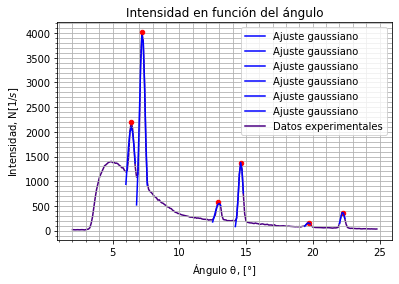

In [ ]:
lim = [40,48,48,57,105,112,122,129,174,179,200,205]

Farben= ["hotpink","gray","indigo","darkturquoise","purple","dodgerblue", "forestgreen"]
fig = plt.figure()
ax = fig.subplots()
ax.minorticks_on()
ax.grid(b=True,which="both", zorder=-1)

valx1=d1.loc[:232,d1.columns[0]]
valy1=d1.loc[:232,d1.columns[1]]
x1=valx1.values 
y1=valy1.values
  #Find peaks
peaks = ([ 44,  52, 109, 126, 177,203],{})#find_peaks(y1, threshold=10)
height = y1[peaks[0]] #list of the heights of the peaks
peak_pos = x1[peaks[0]] #list of the peaks positions
p = x1[peaks[0]]

for ii in range(6):
  x2 = x1[lim[2*ii]:lim[2*ii + 1]]
  y2 = y1[lim[2*ii]:lim[2*ii + 1]]
  popt, pcov = curve_fit(gaussiana,x2, y2, p0 = (x1[lim[2*ii]],x1[lim[2*ii+1]],100))
  a, b, c = popt
  plt.plot(x2, gaussiana(x2,*popt), color='blue',label="Ajuste gaussiano")
  desv=(c/2)**(0.5) #desviacion estandar
  m = p[ii]
  rad = (m/180)*np.pi
  print( "pico: %d  --> desviacion estandar=%.6f   θ=%.1f"% (ii+1, desv/180*np.pi, m))

  l = 2 * 282.01/1000 * np.sin(rad)
  if ii in [2,3]:
    l = l/2
  elif ii in [4,5]:
    l = l/3 
  v = (3*10**(8+9)/l)
  E = v * 4.135667696*10**(-15)
  print(" θ=%.4f rad, λmin=%.4f, v=%.4E, E = %.4E "%(rad,l,v,E))
  print("")


ax.plot(x1, y1,color="indigo",label='Datos experimentales', zorder=1)
ax.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
print("Angulos de picos en rad")
#print(peaks)

plt.legend(loc="upper right") 
#plt.scatter(x1,y1,color="black",s=12)
plt.ylabel("Intensidad, N[$1/s$]")
plt.xlabel("Ángulo θ, [$ °$]")
plt.title("Intensidad en función del ángulo")  

12.9


Text(0.5, 1.0, 'Intensidad en función del ángulo')

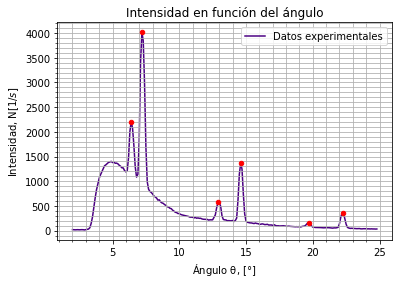

In [ ]:
lim = [367,371,374,390,380,390,386]
Farben= ["hotpink","gray","indigo","darkturquoise","purple","dodgerblue", "forestgreen"]
fig = plt.figure()
ax = fig.subplots()
ax.minorticks_on()
ax.grid(b=True,which="both", zorder=-1)

valx1=d1.loc[:232,d1.columns[0]]
valy1=d1.loc[:232,d1.columns[1]]
x1=valx1.values 
y1=valy1.values
  #Find peaks
peaks = ([ 44,  52, 109, 126, 177,203],{})#find_peaks(y1, threshold=10)
height = y1[peaks[0]] #list of the heights of the peaks
peak_pos = x1[peaks[0]] #list of the peaks positions

ax.plot(x1, y1,color="indigo",label='Datos experimentales', zorder=1)
ax.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
p = x1[peaks[0]]
print(p[2])
#print(peaks)

plt.legend(loc="upper right") 
#plt.scatter(x1,y1,color="black",s=12)
plt.ylabel("Intensidad, N[$1/s$]")
plt.xlabel("Ángulo θ, [$ °$]")
plt.title("Intensidad en función del ángulo")

Text(0.5, 1.0, 'Intensidad en función del ángulo')

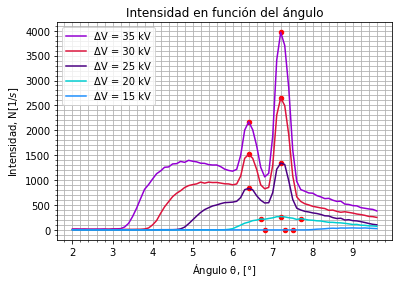

In [ ]:
#Ciclo for
pot= [35,30,25,20,15]
lim = [261,296,255,282,252,331,249]
lam1 = [12,18,26,38,59]
lam2 = [18,28,32,44,64]
Farben= ["darkviolet","crimson","indigo","darkturquoise","dodgerblue", "forestgreen"]

for ii in range(5): 
  valx1=d1.loc[:80,d1.columns[2]]
  valy1=d1.loc[:80,d1.columns[3+ii]]
  x1=valx1.values 
  y1=valy1.values
  x2 = x1[lam1[ii]:lam2[ii]]
  y2 = y1[lam1[ii]:lam2[ii]]
  if ii < 3:
    peaks = find_peaks(y1[:60], threshold=23)
  elif ii == 3:
    peaks = ([ 47, 52, 57],{})
  elif ii == 4:
    peaks = ([ 48, 53, 55],{})
  height = y1[peaks[0]] #list of the heights of the peaks
  peak_pos = x1[peaks[0]] #list of the peaks positions

  plt.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
  plt.plot(x1, y1,color=Farben[ii],label='ΔV = %.d kV' % pot[ii])

#plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")


plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Intensidad, N[$1/s$]")
plt.xlabel("Ángulo θ, [$ °$]")
plt.title("Intensidad en función del ángulo")

            P=(1221.43 +- 166.60)*x + (-3956.90 +- 1018.63), $R^2$= 0.969 
ΔV= 35 kV -> θmin=3.24° rad:0.0565, λmin=0.0319, v=9.4123E+18, E = 3.8926E+04 

            P=(962.63 +- 116.96)*x + (-3701.44 +- 715.10), $R^2$= 0.991 
ΔV= 30 kV -> θmin=3.85° rad:0.0671, λmin=0.0378, v=7.9317E+18, E = 3.2803E+04 

            P=(558.23 +- 58.18)*x + (-2592.91 +- 355.72), $R^2$= 0.973 
ΔV= 25 kV -> θmin=4.64° rad:0.0811, λmin=0.0457, v=6.5683E+18, E = 2.7164E+04 

            P=(269.83 +- 27.17)*x + (-1577.00 +- 166.11), $R^2$= 0.971 
ΔV= 20 kV -> θmin=5.84° rad:0.1020, λmin=0.0574, v=5.2235E+18, E = 2.1603E+04 

            P=(54.20 +- 8.26)*x + (-426.02 +- 50.52), $R^2$= 0.994 
ΔV= 15 kV -> θmin=7.86° rad:0.1372, λmin=0.0771, v=3.8894E+18, E = 1.6085E+04 



Text(0.5, 1.0, 'Intensidad en función del ángulo')

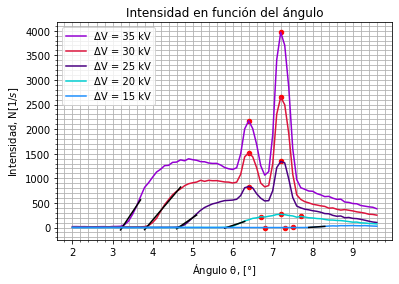

In [ ]:
#Ciclo for
pot= [35,30,25,20,15]
lim = [261,296,255,282,252,331,249]
lam1 = [12,18,26,38,59]
lam2 = [18,28,32,44,64]
Farben= ["darkviolet","crimson","indigo","darkturquoise","dodgerblue", "forestgreen"]

for ii in range(5): 
  valx1=d1.loc[:80,d1.columns[2]]
  valy1=d1.loc[:80,d1.columns[3+ii]]
  x1=valx1.values 
  y1=valy1.values
  x2 = x1[lam1[ii]:lam2[ii]]
  y2 = y1[lam1[ii]:lam2[ii]]
  if ii < 3:
    peaks = find_peaks(y1[:60], threshold=23)
  elif ii == 3:
    peaks = ([ 47, 52, 57],{})
  elif ii == 4:
    peaks = ([ 48, 53, 55],{})
  height = y1[peaks[0]] #list of the heights of the peaks
  peak_pos = x1[peaks[0]] #list of the peaks positions

  plt.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
  plt.plot(x1, y1,color=Farben[ii],label='ΔV = %.d kV' % pot[ii])
  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x2,y2)
  plt.plot(x2, f1(x2, gradient1, intercept1), 'b-',color="black")
  #print(y1[peaks])
  #print("X0 -->", end = " ")
  m = intercept1/gradient1*-1
  rad = (m/180)*np.pi
  l = 2 * 282.01/1000 * np.sin(rad)
  v = (3*10**(8+9)/l)
  E = v * 4.135667696*10**(-15)
  Eg, Ei = ERROR(x1,y1, gradient1, intercept1)
  print("            P=(%2.2f +- %2.2f)*x + (%2.2f +- %2.2f), $R^2$= %3.3f "%(gradient1,Eg, intercept1,Ei, r_value1 ))
  print("ΔV= %.d kV -> θmin=%.2f° rad:%.4f, λmin=%.4f, v=%.4E, E = %.4E "%(pot[ii], m,rad,l,v,E))
  print("")


#plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")


plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Intensidad, N[$1/s$]")
plt.xlabel("Ángulo θ, [$ °$]")
plt.title("Intensidad en función del ángulo")

In [ ]:
#Ciclo for
pot= [35,30,25,20,15]
lim = [261,296,255,282,252,331,249]
lam1 = [12,18,26,38,59]
lam2 = [18,28,32,44,64]
Farben= ["darkviolet","crimson","indigo","darkturquoise","dodgerblue", "forestgreen"]

for ii in range(1): 
  valx1=d1.loc[:80,d1.columns[2]]
  valy1=d1.loc[:80,d1.columns[3+ii]]
  x1=valx1.values 
  y1=valy1.values
  x2 = x1[lam1[ii]:lam2[ii]]
  y2 = y1[lam1[ii]:lam2[ii]]
  if ii < 3:
    peaks = find_peaks(y1[:60], threshold=23)
  height = y1[peaks[0]] #list of the heights of the peaks
  peak_pos = x1[peaks[0]] #list of the peaks positions

  plt.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
  plt.plot(x1, y1,color=Farben[ii],label='ΔV = %.d kV' % pot[ii])
  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x2,y2)
  plt.plot(x2, f1(x2, gradient1, intercept1), 'b-',color="black")


#plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")


plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Intensidad, N[$1/s$]")
plt.xlabel("Ángulo θ, [$ °$]")
plt.title("Intensidad en función del ángulo")

Error m = 0.014594


Text(0.5, 1.0, 'Energia en función de (1/$λ_{min}$)[1/nm]')

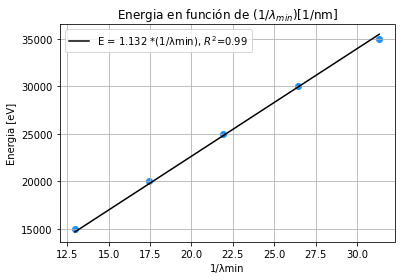

In [ ]:
x3 = np.array([0.0319,0.0378,0.0457,0.0574,0.0771])
y3 = np.array([35000, 30000,25000,20000,15000])
#y3 = [389260, 32803E+04, 2.7164E+04, 2.1603E+04, 1.6085E+04]
x3 = 1/x3


plt.scatter(x3, y3,color="dodgerblue")
popt, pcov = curve_fit(f2,x3, y3)
a = popt[0]
plt.plot(x3, f2(x3, a), 'b-',color="black", label = 'E = %.3f *(1/λmin), $R^2$=%.2f'%(a/1000, 0.99))
Em, Eb = ERROR(x3, y3,a,0)
print("Error m = %f"%(Em/1000))



plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Energia [eV]")
plt.xlabel("1/λmin")
plt.title("Energia en función de (1/$λ_{min}$)[1/nm]")

#Parte 3

Text(0.5, 1.0, 'Intensidad en función del ángulo a distintos valores de corriente')

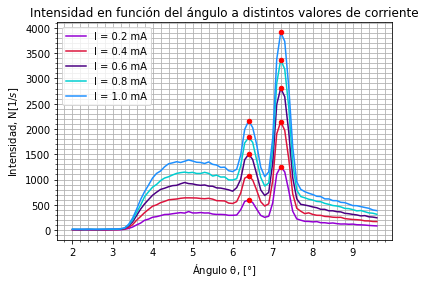

In [ ]:
#Ciclo for
pot= [0.2,0.4,0.6,0.8,1.0]
lim = [261,296,255,282,252,331,249]
lam1 = [12,18,26,38,59]
lam2 = [18,28,32,44,64]
Farben= ["darkviolet","crimson","indigo","darkturquoise","dodgerblue", "forestgreen"]

for ii in range(5): 
  valx1=d1.loc[:80,d1.columns[8]]
  valy1=d1.loc[:80,d1.columns[9+ii]]
  x1=valx1.values 
  y1=valy1.values
  #peaks = find_peaks(y1[:60], threshold=25)
  peaks = ([ 44, 52],{})
  height = y1[peaks[0]] #list of the heights of the peaks
  peak_pos = x1[peaks[0]] #list of the peaks positions

  plt.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=3)
  plt.plot(x1, y1,color=Farben[ii],label='I = %.1f mA' % pot[ii])

#plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")


plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Intensidad, N[$1/s$]")
plt.xlabel("Ángulo θ, [$ °$]")
plt.title("Intensidad en función del ángulo a distintos valores de corriente")

In [ ]:
m1 = 6.2
m2 = 7.2
rad1 = (m1/180)*np.pi
rad2 = (m2/180)*np.pi
l1 = 2 * 282.01/1000 * np.sin(rad1)
l2 = 2 * 282.01/1000 * np.sin(rad2)
print(l1)
print(l2)

0.060913796605311
0.07069045039493889


pico: 1  --> desviacion estandar=0.004850   θ=6.4
 θ=0.1117 rad, λmin=0.0629, v=4.7717E+18, E = 1.9734E+04 

pico: 2  --> desviacion estandar=0.003199   θ=7.2
 θ=0.1257 rad, λmin=0.0707, v=4.2439E+18, E = 1.7551E+04 

pico: 1  --> desviacion estandar=0.005017   θ=6.4
 θ=0.1117 rad, λmin=0.0629, v=4.7717E+18, E = 1.9734E+04 

pico: 2  --> desviacion estandar=0.003370   θ=7.2
 θ=0.1257 rad, λmin=0.0707, v=4.2439E+18, E = 1.7551E+04 

pico: 1  --> desviacion estandar=0.005233   θ=6.4
 θ=0.1117 rad, λmin=0.0629, v=4.7717E+18, E = 1.9734E+04 

pico: 2  --> desviacion estandar=0.003527   θ=7.2
 θ=0.1257 rad, λmin=0.0707, v=4.2439E+18, E = 1.7551E+04 

pico: 1  --> desviacion estandar=0.005435   θ=6.4
 θ=0.1117 rad, λmin=0.0629, v=4.7717E+18, E = 1.9734E+04 

pico: 2  --> desviacion estandar=0.003633   θ=7.2
 θ=0.1257 rad, λmin=0.0707, v=4.2439E+18, E = 1.7551E+04 

pico: 1  --> desviacion estandar=0.005524   θ=6.4
 θ=0.1117 rad, λmin=0.0629, v=4.7717E+18, E = 1.9734E+04 

pico: 2  --> desvia

Text(0.5, 1.0, 'Intensidad en función del ángulo a distintos valores de corriente')

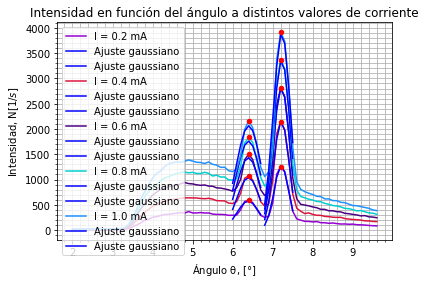

In [ ]:
#Ciclo for
pot= [0.2,0.4,0.6,0.8,1.0]
lim = [40,48,48,56]
Farben= ["darkviolet","crimson","indigo","darkturquoise","dodgerblue", "forestgreen"]

for ii in range(5): 
  valx1=d1.loc[:80,d1.columns[8]]
  valy1=d1.loc[:80,d1.columns[9+ii]]
  x1=valx1.values 
  y1=valy1.values
  #peaks = find_peaks(y1[:60], threshold=25)
  peaks = ([ 44, 52],{})
  height = y1[peaks[0]] #list of the heights of the peaks
  peak_pos = x1[peaks[0]] #list of the peaks positions

  plt.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=3)
  plt.plot(x1, y1,color=Farben[ii],label='I = %.1f mA' % pot[ii])
  p = x1[peaks[0]]

  for ii in range(2):
    x2 = x1[lim[2*ii]:lim[2*ii + 1]]
    y2 = y1[lim[2*ii]:lim[2*ii + 1]]
    popt, pcov = curve_fit(gaussiana,x2, y2, p0 = (x1[lim[2*ii]],x1[lim[2*ii+1]],100))
    a, b, c = popt
    plt.plot(x2, gaussiana(x2,*popt), color='blue',label="Ajuste gaussiano")
    desv=(c/2)**(0.5) #desviacion estandar
    m = p[ii]
    rad = (m/180)*np.pi
    print( "pico: %d  --> desviacion estandar=%.6f   θ=%.1f"% (ii+1, desv/180*np.pi, m))

    l = 2 * 282.01/1000 * np.sin(rad)
    if ii in [2,3]:
      l = l/2
    elif ii in [4,5]:
      l = l/3 
    v = (3*10**(8+9)/l)
    E = v * 4.135667696*10**(-15)
    print(" θ=%.4f rad, λmin=%.4f, v=%.4E, E = %.4E "%(rad,l,v,E))
    print("")





#plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")


plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Intensidad, N[$1/s$]")
plt.xlabel("Ángulo θ, [$ °$]")
plt.title("Intensidad en función del ángulo a distintos valores de corriente")